In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#### THREE STORES 77,86 AND 88 HAVE BEEN SELECTED AS TRIAL STORES FOR PERIOD FEB 2019 TO APRIL 2019, NOW WE NEED TO SELECT CONTROL STORES FOR TRIAL STORES WHICH FOLLOW SIMILAR TRAJECTORY, SO THAT IMPACT OF TRIAL LAYOUT ORGANIZED IN SAID PERIOD CAN BE PROPERLY ANALYSED.

In [2]:
raw_data = pd.read_csv("Sales Data Merged and Preprocessed.csv")

In [3]:
df= raw_data.copy()
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE(g),BRAND_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-19,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-16,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-22,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-19,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-20,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [4]:
df = df.iloc[:,[2,0,1,4,5,6,3,9,8,10,11,7]]
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TXN_ID,BRAND_NAME,PACK_SIZE(g),LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,1000,2018-10-19,1,5,Natural Chip Compny SeaSalt175g,2,1,Natural,175,YOUNG SINGLES/COUPLES,Premium,6.0
1,1307,2019-05-16,1,66,CCs Nacho Cheese 175g,3,348,CCs,175,MIDAGE SINGLES/COUPLES,Budget,6.3
2,1343,2019-05-22,1,61,Smiths Crinkle Cut Chips Chicken 170g,2,383,Smiths,170,MIDAGE SINGLES/COUPLES,Budget,2.9
3,2373,2018-08-19,2,69,Smiths Chip Thinly S/Cream&Onion 175g,5,974,Smiths,175,MIDAGE SINGLES/COUPLES,Budget,15.0
4,2426,2018-08-20,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,1038,Kettle,150,MIDAGE SINGLES/COUPLES,Budget,13.8


In [5]:
df['STORE_NBR'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

In [6]:
df.loc[df['STORE_NBR']== 77][['DATE','PROD_QTY','TOT_SALES']]

,DATE,PROD_QTY,TOT_SALES
202,2019-06-19,2,8.4
1438,2019-03-30,1,3.3
1439,2019-04-15,1,3.0
1440,2018-07-19,1,2.3
1441,2019-03-05,2,8.4
...,...,...,...
263914,2018-07-24,1,2.1
263920,2018-09-30,2,3.8
263922,2018-09-20,2,5.4
263928,2018-07-31,2,5.4


In [7]:
#Converting date column from string to datetime column
df['DATE'] = pd.to_datetime(df['DATE'])

In [8]:
df['Month'] = df['DATE'].dt.month_name()

In [9]:
df['Year'] = df['DATE'].dt.year

In [10]:
df['Month'].value_counts()

Month
December     22853
March        22628
July         22571
August       22487
May          22403
October      22342
January      22143
November     21798
June         21797
April        21727
September    21673
February     20412
Name: count, dtype: int64

In [11]:
df['DATE'].sort_values(ascending = False)

177002   2019-07-02
40823    2019-07-02
264142   2019-07-02
183722   2019-07-02
261274   2019-07-02
            ...    
203757   2018-07-03
230715   2018-07-03
158469   2018-07-03
103273   2018-07-03
72228    2018-07-03
Name: DATE, Length: 264834, dtype: datetime64[ns]

In [12]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TXN_ID,BRAND_NAME,PACK_SIZE(g),LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,Month,Year
0,1000,2018-10-19,1,5,Natural Chip Compny SeaSalt175g,2,1,Natural,175,YOUNG SINGLES/COUPLES,Premium,6.0,October,2018
1,1307,2019-05-16,1,66,CCs Nacho Cheese 175g,3,348,CCs,175,MIDAGE SINGLES/COUPLES,Budget,6.3,May,2019
2,1343,2019-05-22,1,61,Smiths Crinkle Cut Chips Chicken 170g,2,383,Smiths,170,MIDAGE SINGLES/COUPLES,Budget,2.9,May,2019
3,2373,2018-08-19,2,69,Smiths Chip Thinly S/Cream&Onion 175g,5,974,Smiths,175,MIDAGE SINGLES/COUPLES,Budget,15.0,August,2018
4,2426,2018-08-20,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,1038,Kettle,150,MIDAGE SINGLES/COUPLES,Budget,13.8,August,2018


##### CHARACTERISTICS OF TRIAL STORES 77, 86 AND 88

In [13]:
monthly_store_77 = df.loc[df['STORE_NBR']== 77][['Month','PROD_QTY','TOT_SALES']]

In [14]:
monthly_store_77.groupby('Month').sum().mean()

PROD_QTY      72.666667
TOT_SALES    253.333333
dtype: float64

In [15]:
df.loc[df['STORE_NBR']== 77]['LYLTY_CARD_NBR'].nunique()

356

In store 77 - monthly average sale is 253 and quantity ordered is 72.66 with total yearly transanctions are 563 and total customers are 356 total sale is 3040

In [16]:
monthly_store_86 = df.loc[df['STORE_NBR']== 86][['Month','PROD_QTY','TOT_SALES']]

In [17]:
monthly_store_86.groupby('Month').sum().sum()

PROD_QTY      3066.00
TOT_SALES    10635.35
dtype: float64

In [18]:
df.loc[df['STORE_NBR']== 86]['LYLTY_CARD_NBR'].nunique()

273

IN store 86, monthly average sale is 886(thrice of trial store 77) and quantity ordered is 255(more than thrice of 77) total yearly transactions are 1538 and total unique customers are 273 total sale is 10635

In [19]:
monthly_store_88 = df.loc[df['STORE_NBR']== 88][['Month','PROD_QTY','TOT_SALES']]
monthly_store_88.groupby('Month').sum().mean()

PROD_QTY      309.833333
TOT_SALES    1361.104167
dtype: float64

In [20]:
df.loc[df['STORE_NBR']== 88]['LYLTY_CARD_NBR'].nunique()

388

IN store 88, monthly average sale is 1361(five times of trial store 77) and quantity ordered is 309(more than four times of 77) with total number of transaction are 1873 and total unique customers are 388. total sale is 16333

In [21]:
monthly_store_88.head()

,Month,PROD_QTY,TOT_SALES
69,May,2,9.2
1641,September,2,13.0
1642,October,2,7.6
1643,February,2,10.8
1644,May,2,8.8


#### WE NEED TO FIND CONTROL STORES WHICH HAVE SIMILAR BEHAVIOUR IN OUR ANALYSIS TO HAVE THE TRIAL TO BE EXECUTED THERE.

In [22]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TXN_ID,BRAND_NAME,PACK_SIZE(g),LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,Month,Year
0,1000,2018-10-19,1,5,Natural Chip Compny SeaSalt175g,2,1,Natural,175,YOUNG SINGLES/COUPLES,Premium,6.0,October,2018
1,1307,2019-05-16,1,66,CCs Nacho Cheese 175g,3,348,CCs,175,MIDAGE SINGLES/COUPLES,Budget,6.3,May,2019
2,1343,2019-05-22,1,61,Smiths Crinkle Cut Chips Chicken 170g,2,383,Smiths,170,MIDAGE SINGLES/COUPLES,Budget,2.9,May,2019
3,2373,2018-08-19,2,69,Smiths Chip Thinly S/Cream&Onion 175g,5,974,Smiths,175,MIDAGE SINGLES/COUPLES,Budget,15.0,August,2018
4,2426,2018-08-20,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,1038,Kettle,150,MIDAGE SINGLES/COUPLES,Budget,13.8,August,2018


In [23]:
control_store_data = df.groupby(['STORE_NBR','Month'])[['PROD_QTY','TOT_SALES']].sum()
control_store_data

PROD_QTY  TOT_SALES
STORE_NBR Month                         
1         April            59      194.6
          August           59      199.6
          December         63      204.9
          February         63      224.5
          January          41      150.9
...                       ...        ...
272       March            97      425.7
          May              77      338.2
          November         87      376.2
          October          95      414.2
          September        75      324.1

[3169 rows x 2 columns]

In [24]:
control_store_data=control_store_data.reset_index()

In [25]:
df['YEARMONTH'] = df['DATE'].dt.to_period('M')

In [26]:
df.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,PROD_NBR,PROD_NAME,PROD_QTY,TXN_ID,BRAND_NAME,PACK_SIZE(g),LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,Month,Year,YEARMONTH
0,1000,2018-10-19,1,5,Natural Chip Compny SeaSalt175g,2,1,Natural,175,YOUNG SINGLES/COUPLES,Premium,6.0,October,2018,2018-10
1,1307,2019-05-16,1,66,CCs Nacho Cheese 175g,3,348,CCs,175,MIDAGE SINGLES/COUPLES,Budget,6.3,May,2019,2019-05
2,1343,2019-05-22,1,61,Smiths Crinkle Cut Chips Chicken 170g,2,383,Smiths,170,MIDAGE SINGLES/COUPLES,Budget,2.9,May,2019,2019-05
3,2373,2018-08-19,2,69,Smiths Chip Thinly S/Cream&Onion 175g,5,974,Smiths,175,MIDAGE SINGLES/COUPLES,Budget,15.0,August,2018,2018-08
4,2426,2018-08-20,2,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,1038,Kettle,150,MIDAGE SINGLES/COUPLES,Budget,13.8,August,2018,2018-08


In [27]:
#setting trial period from feb 2019-april 2019
trial_start = pd.Period('2019-02', freq = 'M')
trial_end = pd.Period('2019-04', freq = 'M')
pre_trial_end = trial_start - 1
pre_trial_start = pd.Period('07-2018', freq = 'M')


In [28]:
monthly = df.groupby(['YEARMONTH', 'STORE_NBR']).agg(
                        TOT_SALE = ('TOT_SALES','sum'),
                        CUSTOMERS = ('LYLTY_CARD_NBR','nunique')).reset_index()
monthly.head()

,YEARMONTH,STORE_NBR,TOT_SALE,CUSTOMERS
0,2018-07,1,183.4,46
1,2018-07,2,141.2,36
2,2018-07,3,1140.1,106
3,2018-07,4,1326.5,122
4,2018-07,5,776.2,90


In [29]:
monthly['AVG_SALE_PER_CUST'] = monthly['TOT_SALE'] / monthly['CUSTOMERS']

In [30]:
monthly[monthly['STORE_NBR']==1]

,YEARMONTH,STORE_NBR,TOT_SALE,CUSTOMERS,AVG_SALE_PER_CUST
0,2018-07,1,183.4,46,3.986957
266,2018-08,1,199.6,46,4.339130
529,2018-09,1,258.7,56,4.619643
793,2018-10,1,201.7,44,4.584091
1058,2018-11,1,179.6,42,4.276190
1322,2018-12,1,204.9,46,4.454348
1585,2019-01,1,150.9,35,4.311429
1848,2019-02,1,224.5,51,4.401961
2112,2019-03,1,193.7,46,4.210870
2377,2019-04,1,194.6,43,4.525581


In [31]:
pre = monthly[(monthly['YEARMONTH'] >= pre_trial_start) & (monthly['YEARMONTH'] <= pre_trial_end)].copy()

store_df1 = (
    pre.groupby('STORE_NBR')
       .agg(TOTAL_SALE=('TOT_SALE','sum'),
            AVG_SALE_MONTHLY=('TOT_SALE','mean'),
            AVG_SALE_PER_CUST=('AVG_SALE_PER_CUST','mean'),      
            AVG_CUST_MONTHLY=('CUSTOMERS','mean'))           
       .reset_index()
)


In [32]:
store_df1.head() # monthly analysis of all stores in pre trial period.

,STORE_NBR,TOTAL_SALE,AVG_SALE_MONTHLY,AVG_SALE_PER_CUST,AVG_CUST_MONTHLY
0,1,1378.80,196.971429,4.367398,45.000000
1,2,1124.30,160.614286,4.149788,38.714286
2,3,7443.75,1063.392857,10.010493,106.285714
3,4,8995.60,1285.085714,10.694143,120.142857
4,5,5657.50,808.214286,8.756733,92.428571


In [33]:
monthly

,YEARMONTH,STORE_NBR,TOT_SALE,CUSTOMERS,AVG_SALE_PER_CUST
0,2018-07,1,183.4,46,3.986957
1,2018-07,2,141.2,36,3.922222
2,2018-07,3,1140.1,106,10.755660
3,2018-07,4,1326.5,122,10.872951
4,2018-07,5,776.2,90,8.624444
...,...,...,...,...,...
3411,2019-07,268,10.4,2,5.200000
3412,2019-07,269,65.2,8,8.150000
3413,2019-07,270,32.2,4,8.050000
3414,2019-07,271,76.4,11,6.945455


In [34]:
#A FUNCTION WHICH SELECT CONTROL STORES BASED ON CORREALTION AND RELATIVE PERCENTAGE DIFFERENCE
def store_selection_before_trial(trial_store,monthly, pre_start,pre_end,top_n):
    pre = monthly[(monthly['YEARMONTH']>= pre_start) & (monthly['YEARMONTH']<= pre_end)] # pre-trial period data

    #getting trial_store data for pre-trial period
    trial_data = pre[pre['STORE_NBR'] == trial_store].set_index('YEARMONTH')[['TOT_SALE','CUSTOMERS']]
    

    #getting candidate data for pre-trial period
    #first - getting candidates customer number
    cand_df = pre[['STORE_NBR']].drop_duplicates()
    cand_df = cand_df['STORE_NBR'].tolist()
    cand_list = [c for c in cand_df if c!= trial_store]
    results = []
    for c in cand_list:
        cand_data = pre[pre['STORE_NBR'] == c].set_index('YEARMONTH')[['TOT_SALE','CUSTOMERS']]
        merged = trial_data.join(cand_data, how = 'inner', lsuffix = '_TRIAL', rsuffix = '_CAND')

        if len(merged)<4: # minimum overlap of 4 months
            continue

        #calculating correlation between candidate and trial stores
        corr_cust = merged['CUSTOMERS_TRIAL'].corr(merged['CUSTOMERS_CAND'])
        corr_sale = merged['TOT_SALE_TRIAL'].corr(merged['TOT_SALE_CAND'])

        #calculating relative difference between trial and candidate stores
        diff_cust = abs(merged['CUSTOMERS_TRIAL'].mean() - merged['CUSTOMERS_CAND'].mean()) / merged['CUSTOMERS_TRIAL'].mean()
        diff_sale = abs(merged['TOT_SALE_TRIAL'].mean() - merged['TOT_SALE_CAND'].mean()) / merged['TOT_SALE_TRIAL'].mean()

        #final score of candidate store
        score = ((corr_cust or 0) + (corr_sale or 0)) / 2 - (diff_cust+diff_sale)/ 2

        #creating list of all calculations
        results.append({
            'STORE_NBR': c,
            'CORR_SALES': corr_sale,
            'CORR_CUSTOMERS': corr_cust,
            'DIFF_SALES': diff_sale,
            'DIFF_CUSTOMERS': diff_cust,
            'SCORE': score
        })

    #converting list into a dataframe and returning the top n rows for candidates based on scores.
    res = pd.DataFrame(results).sort_values('SCORE', ascending = False)
    return res.head(top_n), res

In [35]:
#FUNCTION WHICH PLOTS THE TRIAL STORE AND TOP 3 SELECTED CONTROL STORES FOR EACH STORE FOR PRE-TRIAL PERIOD
def plot_pretrial_trends(trial_store, top_df, monthly, pre_start, pre_end):
    pre = monthly[(monthly['YEARMONTH'] >= pre_start) & (monthly['YEARMONTH'] <= pre_end)].copy()
     # Ensure YEARMONTH is in datetime (for plotting)
    if isinstance(pre['YEARMONTH'].iloc[0], pd.Period):
        pre['YEARMONTH'] = pre['YEARMONTH'].dt.to_timestamp()

    trial_data = pre[pre['STORE_NBR'] == trial_store].set_index('YEARMONTH')

    plt.figure(figsize=(10,5))
    plt.plot(trial_data.index, trial_data['TOT_SALE'], label=f"Trial {trial_store}", linewidth=2, color="black")

    for _, row in top_df.iterrows():
        cand_store = row['STORE_NBR']
        cand_data = pre[pre['STORE_NBR'] == cand_store].set_index('YEARMONTH')
        plt.plot(cand_data.index, cand_data['TOT_SALE'], label=f"Control {cand_store} (score {row['SCORE']})", alpha=0.7)

    plt.title(f"Pre-trial Sales Trend Alignment (Trial {trial_store})")
    plt.xlabel("Month")
    plt.ylabel("Total Sales")
    plt.legend(loc ='upper left' )
    plt.show()

In [36]:
(top_77, all_77) = store_selection_before_trial(77, monthly, pre_trial_start, pre_trial_end, top_n=3)
top_86, all_86 = store_selection_before_trial(86, monthly, pre_trial_start, pre_trial_end, top_n=3)
top_88, all_88 = store_selection_before_trial(88, monthly, pre_trial_start, pre_trial_end, top_n=3)

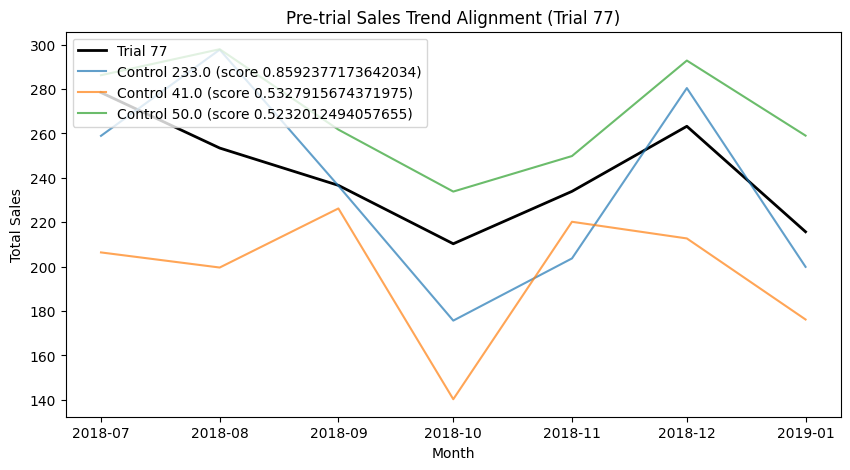

In [37]:
top_77 #store 233 as the control store for 77
plot_pretrial_trends(77, top_77, monthly, pre_trial_start, pre_trial_end)

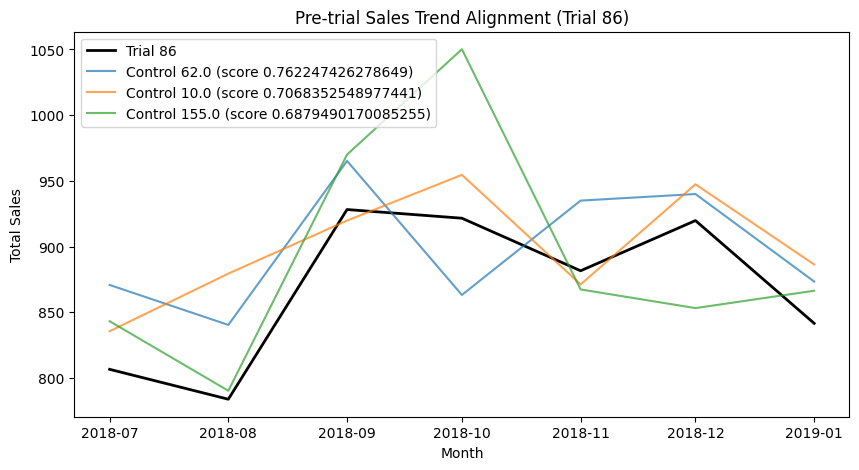

In [38]:
top_86 # store 62 as control store for 86
plot_pretrial_trends(86, top_86, monthly, pre_trial_start, pre_trial_end)

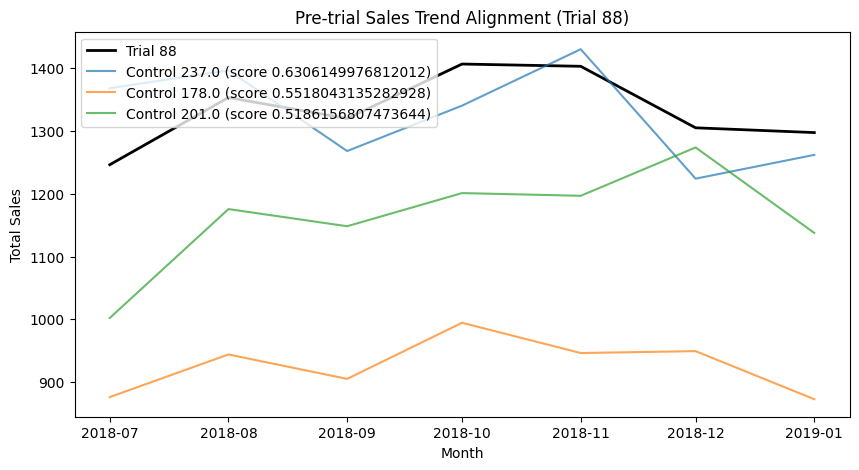

In [39]:
top_88 # store 178 as control store for 88
plot_pretrial_trends(88, top_88, monthly, pre_trial_start, pre_trial_end)

THESE TOP_77, TOP_86, TOP_88 ARE TOP 3 CONTROL STORES SIMILAR TO TRIAL STORES BASED ON THE PRE-TRIAL DATA. 

### NOW WE WILL LOOK FOR IMPACT OF TRIAL ON TRIAL STORES BY ANALYSING THE CAHNGES IN TOP 3 CONTROL STORES AND TRIAL STORES

In [40]:
# FUNCTION WHICH EVALUATE THE PERFORMANCE OF TRIAL STORE BASED ON WELCH T-TEST AND PLOTS THE RESULT
def evaluate_trial(trial_store, control_store, monthly, pre_start, pre_end, trial_start, trial_end, metric):
    # pre-trial series
    pre = monthly[(monthly['YEARMONTH'] >= pre_start) & (monthly['YEARMONTH'] <= pre_end)]
    trial_pre = pre[pre['STORE_NBR']==trial_store].set_index('YEARMONTH')[metric]
    ctrl_pre  = pre[pre['STORE_NBR']==control_store].set_index('YEARMONTH')[metric]

    # trial-period series
    tp = monthly[(monthly['YEARMONTH'] >= trial_start) & (monthly['YEARMONTH'] <= trial_end)]
    trial_tp = tp[tp['STORE_NBR']==trial_store].set_index('YEARMONTH')[metric]
    ctrl_tp  = tp[tp['STORE_NBR']==control_store].set_index('YEARMONTH')[metric]

    # scale control to match pre-trial level of trial store
    scale = trial_pre.mean() / ctrl_pre.mean()
    ctrl_pre_scaled = ctrl_pre * scale
    ctrl_tp_scaled  = ctrl_tp * scale

    # % lift during trial period
    lift = (trial_tp.mean() - ctrl_tp_scaled.mean()) / ctrl_tp_scaled.mean() * 100

    # simple significance test across monthly points in trial period
    # (Welch t-test on monthly values)
    tstat, pval = ttest_ind(trial_tp.values, ctrl_tp_scaled.values, equal_var=False, nan_policy='omit')
    
    # quick plot
    plt.figure(figsize=(9,4))
    pd.concat([trial_pre, trial_tp]).sort_index().plot(label=f'Trial {trial_store}')
    pd.concat([ctrl_pre_scaled, ctrl_tp_scaled]).sort_index().plot(label=f'Control {control_store} (scaled)')
    plt.axvspan(trial_start.to_timestamp(), trial_end.to_timestamp(), alpha=0.15, label='Trial period')
    plt.title(f'{metric}: Store {trial_store} vs Control {control_store}\nLift: {lift:.1f}% (p={pval:.3f})')
    plt.legend()
    plt.tight_layout()
    plt.show()
    test_result = []
    test_result.append({
        'trial_store': trial_store,
        'control_store': control_store,
        'metric': metric,
        'lift_pct': lift,
        'p_value': pval,
        'scale_factor': scale,
        't-test': tstat
    })
    return test_result

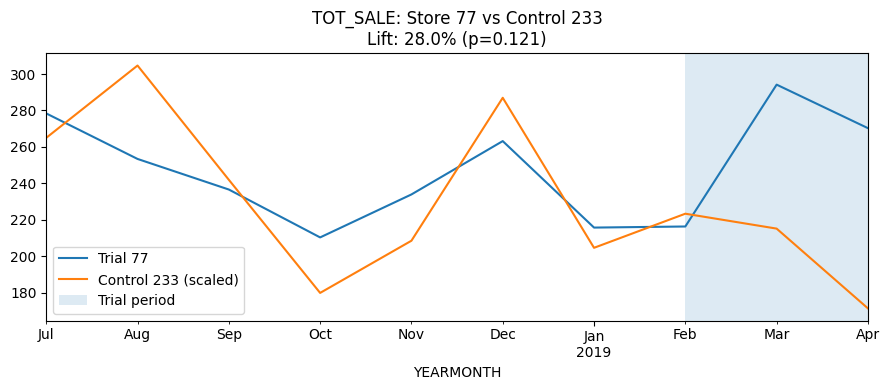

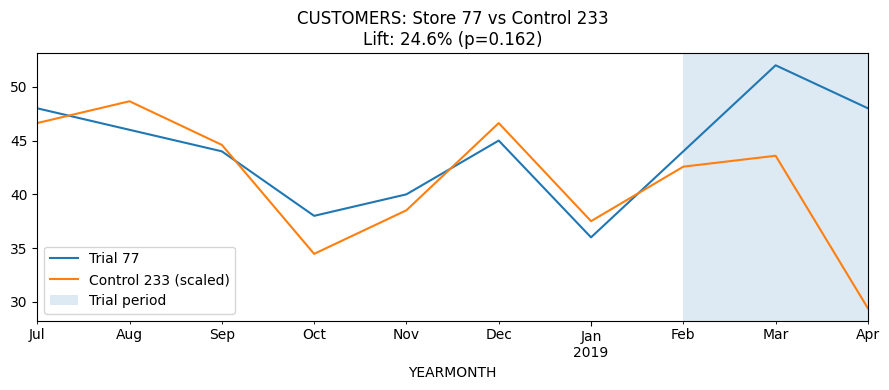

In [41]:
best_ctrl_77 = int(top_77.iloc[0]['STORE_NBR'])
eval_77_sales = evaluate_trial(77, 233, monthly, pre_trial_start, pre_trial_end, trial_start, trial_end, metric='TOT_SALE')
eval_77_custs = evaluate_trial(77, best_ctrl_77, monthly,  pre_trial_start, pre_trial_end, trial_start, trial_end, metric='CUSTOMERS')

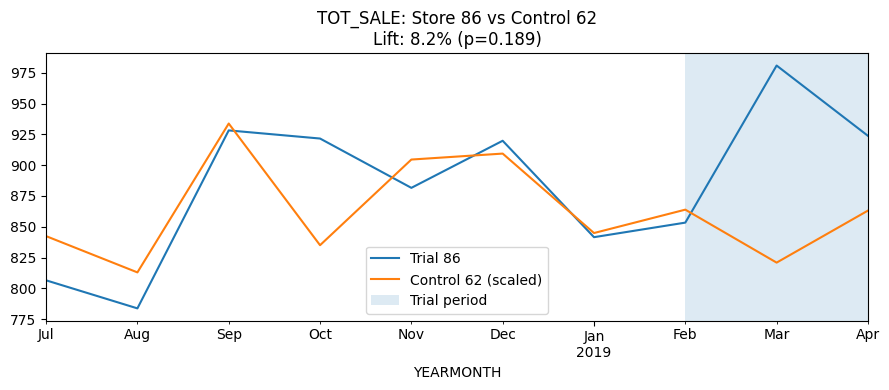

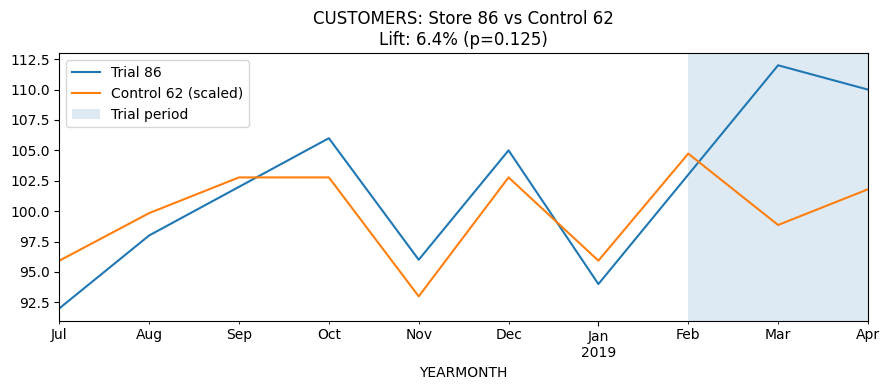

In [42]:
best_ctrl_86 = int(top_86.iloc[0]['STORE_NBR'])
eval_86_sales = evaluate_trial(86, best_ctrl_86, monthly, pre_trial_start, pre_trial_end, trial_start, trial_end, metric='TOT_SALE')
eval_86_custs = evaluate_trial(86, best_ctrl_86, monthly,  pre_trial_start, pre_trial_end, trial_start, trial_end, metric='CUSTOMERS')

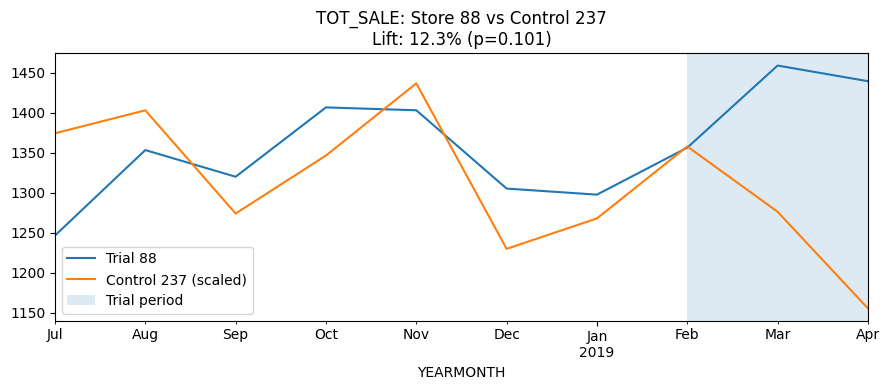

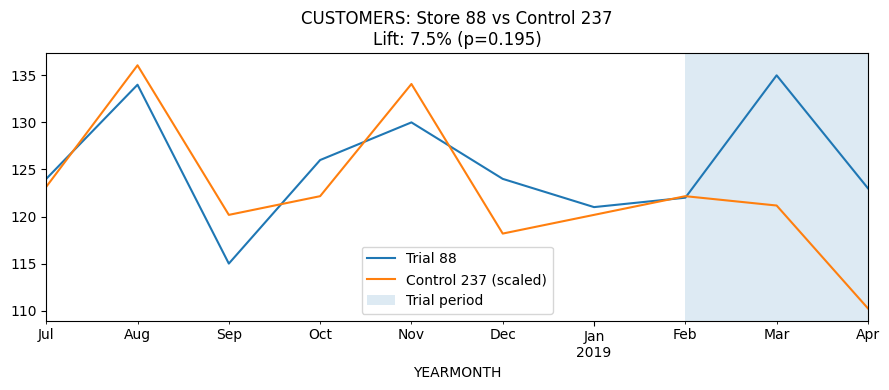

In [43]:
best_ctrl_88 = int(top_88.iloc[0]['STORE_NBR'])
eval_88_sales = evaluate_trial(88, best_ctrl_88, monthly, pre_trial_start, pre_trial_end, trial_start, trial_end, metric='TOT_SALE')
eval_88_custs = evaluate_trial(88, best_ctrl_88, monthly,  pre_trial_start, pre_trial_end, trial_start, trial_end, metric='CUSTOMERS')

## HENCE FROM ABOVE ANALYSIS FOLLOWING INSIGHTS CAN BE DRAWN:
## 1. TOP CONTROL STORE BASED ON DEFINED METRIC FOR EACH OF TRIAL STORE 77,86 AND 88 ARE 233, 62 AND 178 RESPECTIVELY.
## 2. BASED ON TOTAL SALES METRIC IT CAN BE CONCLUDED THAT STORE 77 HAD THE MAXIMUM GROWTH SHOWN BY LIFT OFF OF 28% AND STORES 86 AND 88 ALSO SHOWS POSITIVE GROWTH BUT IT IS LESSER COMPARED TO STORE 77. STORE 88 HAS 12.3% AND STORE 86 HAS 8.2% SALE GROWTH.
## 3. CUSTOMERS METRIC ALSO SHOWS SIMILAR TRENDS AS TOTAL SALES,STORE 77 HAD THE MAXIMUM GROWTH SHOWN BY LIFT OFF OF 24.6% AND STORES 86 AND 88 ALSO SHOWS POSITIVE GROWTH BUT IT IS LESSER COMPARED TO STORE 77. STORE 88 HAS 7.3% AND STORE 86 HAS 6.2% SALE GROWTH.
## 4. INTERESTING HIGHLIGHT IS THAT IN ALL THE THREE STORES THE NUMBERS INCREASED TILL MARCH MONTH AND IN MARCH TO APRIL IN ALL THREE STORES THEY SAW DECLINES IN NUMBERS.
## 5. STORE THAT ARE SIMILAR TO STORE 77 HAS HUGE POTENTIAL OF SALES FROM THIS TRIAL LAYOUTS.
## 6. ALL IN ALL TRIAL LAYOUT IS SUCCESSFUL AND SHOULD BE ROLLED OUT.